<a href="https://colab.research.google.com/github/datav1per/Crypto-currencies-Prediction/blob/main/Cryptocurrency_Prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Domain Information we put:
1. Time series nature: Crypto prices depend on previous trends, requiring sequential modeling.

2. Volatility awareness: Cryptocurrencies show high non-linear volatility → LSTM chosen over linear models.

3. Scaling importance: Used MinMaxScaler to normalize prices for stable neural network training.

4. Forecasting approach: Used previous 60 days to predict next day, aligning with trading strategies.

5. Evaluation metrics: RMSE & MAE chosen for clear financial interpretability.

6. Data sufficiency: Skipped cryptos with insufficient data to ensure meaningful modeling.

In [95]:
# Libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [96]:
# Load dataset
crypto = pd.read_csv('/content/crypto-markets.csv')

# EDA


In [97]:
# EDA
crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942297 entries, 0 to 942296
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   slug         942297 non-null  object 
 1   symbol       942297 non-null  object 
 2   name         942297 non-null  object 
 3   date         942297 non-null  object 
 4   ranknow      942297 non-null  int64  
 5   open         942297 non-null  float64
 6   high         942297 non-null  float64
 7   low          942297 non-null  float64
 8   close        942297 non-null  float64
 9   volume       942297 non-null  float64
 10  market       942297 non-null  float64
 11  close_ratio  942297 non-null  float64
 12  spread       942297 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 93.5+ MB


In [98]:
crypto.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


In [99]:
crypto.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread
count,942297.000000,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,942297.000000,9.422970e+05
mean,1000.170608,3.483522e+02,4.085930e+02,2.962526e+02,3.461018e+02,8.720383e+06,1.725060e+08,0.459499,1.123400e+02
std,587.575283,1.318436e+04,1.616386e+04,1.092931e+04,1.309822e+04,1.839802e+08,3.575590e+09,0.326160,6.783713e+03
min,1.000000,2.500000e-09,3.200000e-09,2.500000e-10,2.000000e-10,0.000000e+00,0.000000e+00,-1.000000,0.000000e+00
25%,465.000000,2.321000e-03,2.628000e-03,2.044000e-03,2.314000e-03,1.750000e+02,2.958100e+04,0.162900,0.000000e+00
50%,1072.000000,2.398300e-02,2.680200e-02,2.143700e-02,2.389200e-02,4.278000e+03,5.227960e+05,0.432400,0.000000e+00
75%,1484.000000,2.268600e-01,2.508940e-01,2.043910e-01,2.259340e-01,1.190900e+05,6.874647e+06,0.745800,3.000000e-02
max,2072.000000,2.298390e+06,2.926100e+06,2.030590e+06,2.300740e+06,2.384090e+10,3.265025e+11,1.000000,1.770563e+06


In [100]:
crypto.duplicated().sum()

np.int64(0)

In [102]:
b=crypto['symbol'].nunique()
b

2005

In [103]:
crypto['date'] = pd.to_datetime(crypto['date'])
print(crypto['date'].min(), crypto['date'].max())

2013-04-28 00:00:00 2018-11-30 00:00:00


In [119]:
save=crypto.to_csv('/content/crypto_modified.csv', index=False)

In [121]:
crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942297 entries, 0 to 942296
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   slug         942297 non-null  object        
 1   symbol       942297 non-null  object        
 2   name         942297 non-null  object        
 3   date         942297 non-null  datetime64[ns]
 4   ranknow      942297 non-null  int64         
 5   open         942297 non-null  float64       
 6   high         942297 non-null  float64       
 7   low          942297 non-null  float64       
 8   close        942297 non-null  float64       
 9   volume       942297 non-null  float64       
 10  market       942297 non-null  float64       
 11  close_ratio  942297 non-null  float64       
 12  spread       942297 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(3)
memory usage: 93.5+ MB


THe data of all cryptocurrency is distributed from 2013-2018


# Bitcoin (BTC) Time-series Analysis: It has the highest market dominance.

Testing the model on one cryptocurrency cause:
1. Data preprocessing steps were correct.
2. Testing model with one then moving on to others
3. Evaluation metrics like RMSE and MAE made sense before generalising.


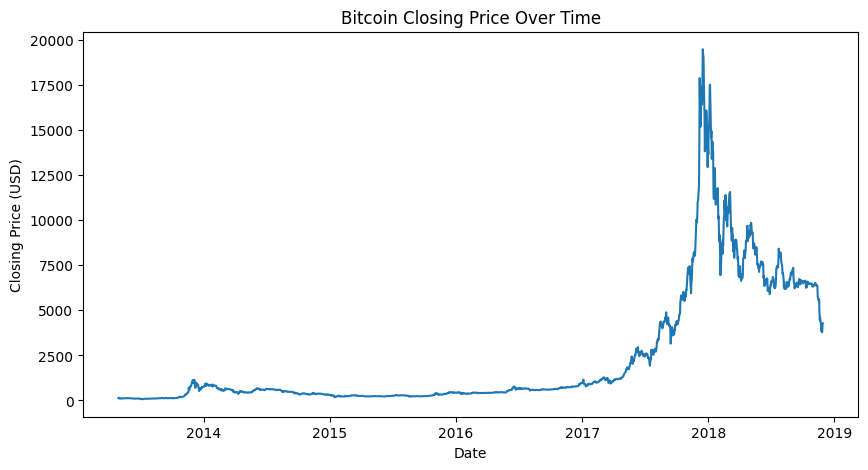

In [104]:
# Filter for Bitcoin (BTC)
btc = crypto[crypto['symbol'] == 'BTC'].copy()

btc = btc[['date', 'close']]

# Convert dates of BTC symbol to datetime as it was in object
btc['date'] = pd.to_datetime(btc['date'])
btc = btc.sort_values('date')

# Drop missing values in case any.
btc.dropna(inplace=True)
btc.reset_index(drop=True, inplace=True)

plt.figure(figsize=(10,5))
plt.plot(btc['date'], btc['close'])
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042 entries, 0 to 2041
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2042 non-null   datetime64[ns]
 1   open    2042 non-null   float64       
 2   close   2042 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 48.0 KB
None
        date    open   close
0 2013-04-28  135.30  134.21
1 2013-04-29  134.44  144.54
2 2013-04-30  144.00  139.00
3 2013-05-01  139.00  116.99
4 2013-05-02  116.38  105.21


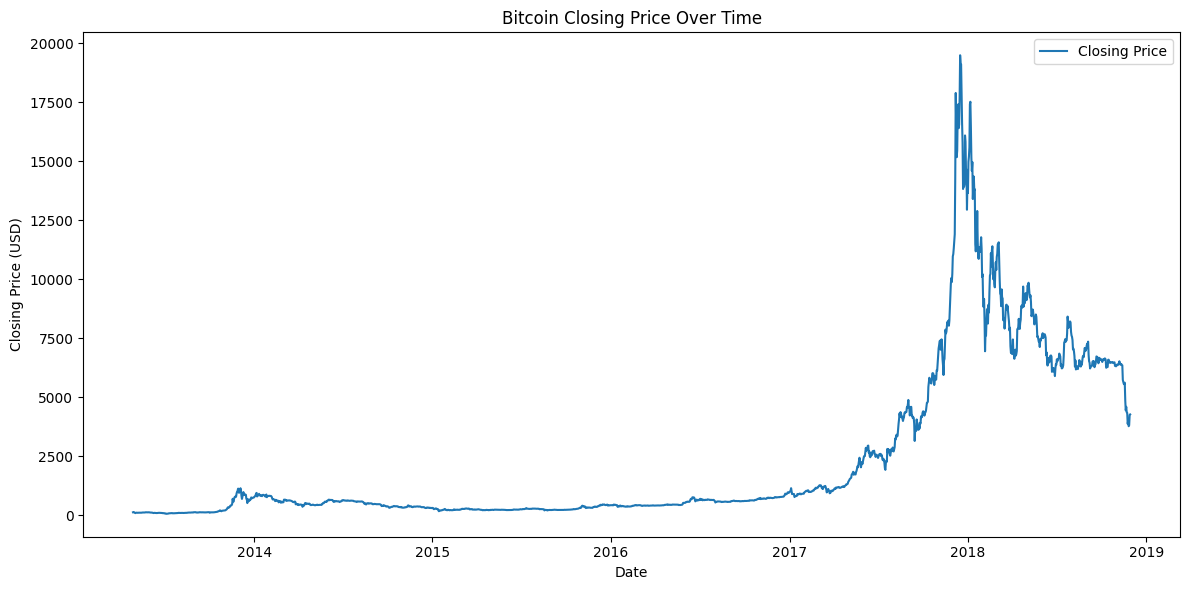

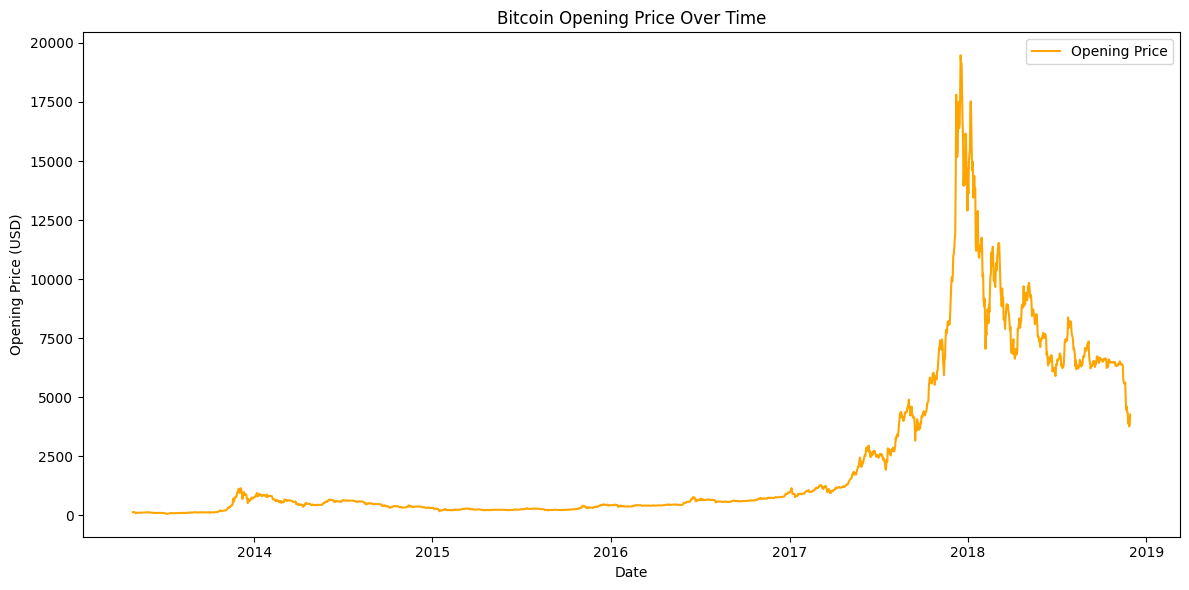

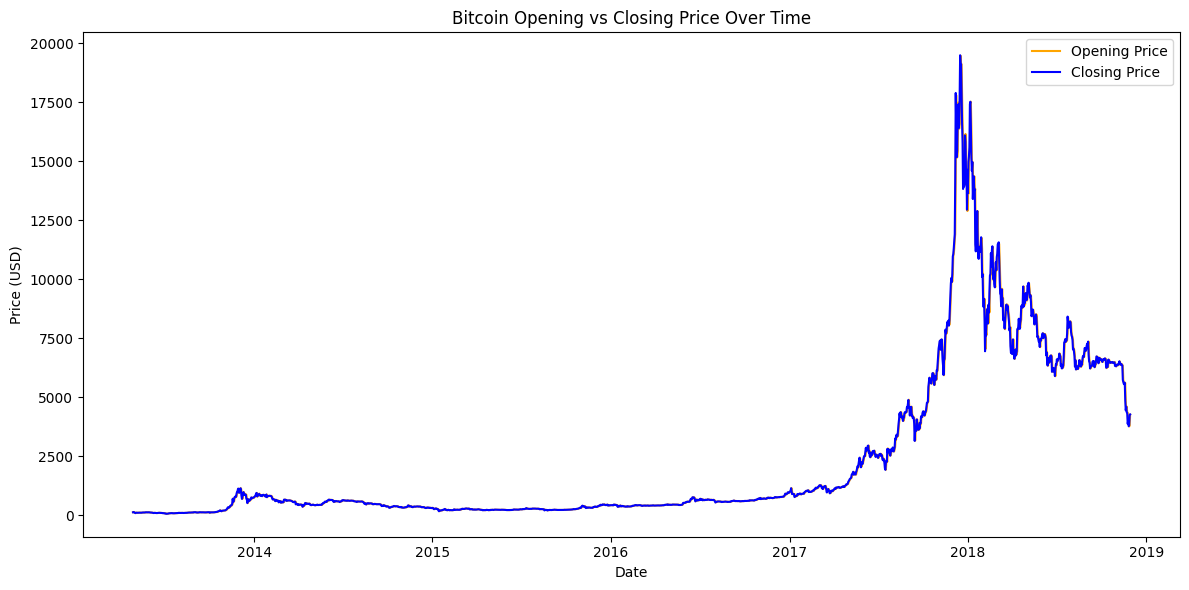

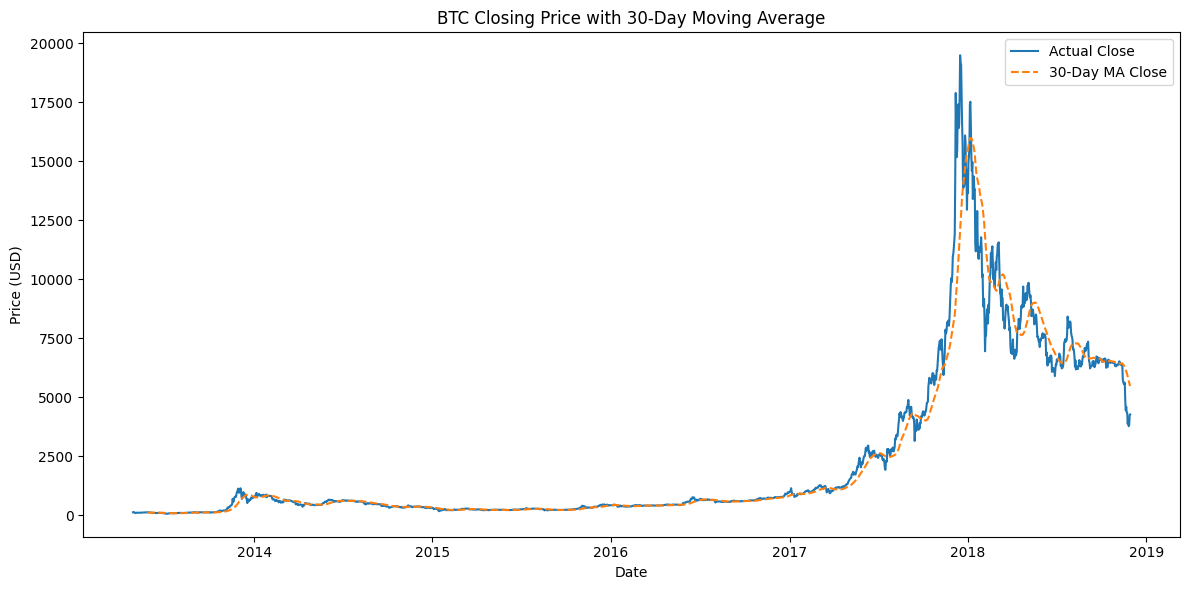

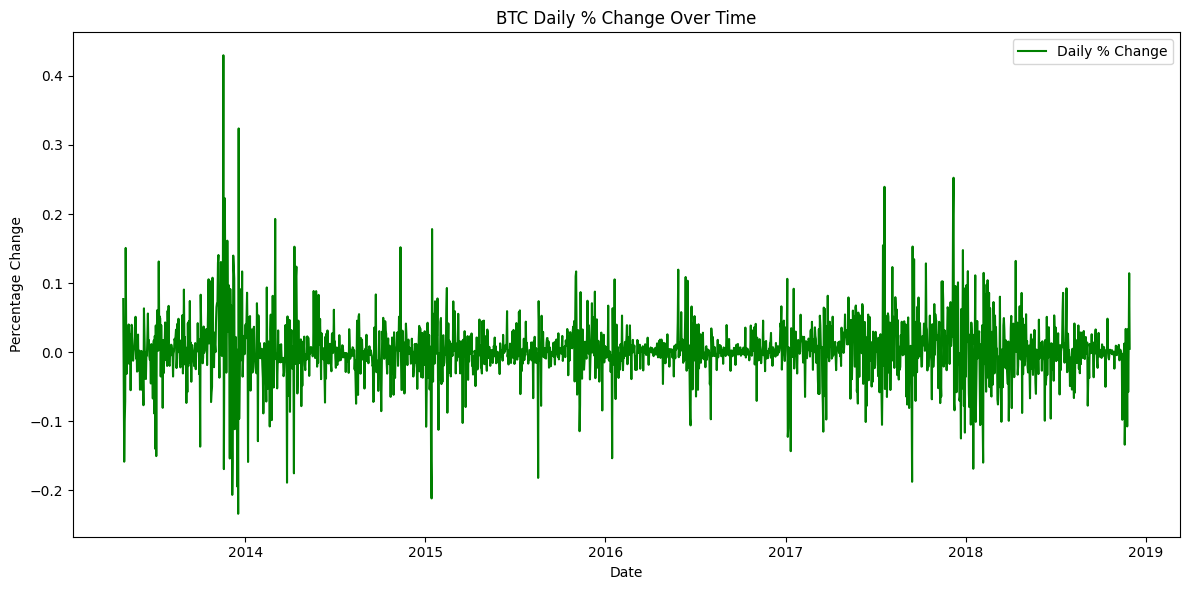

In [115]:
# Filter for Bitcoin (BTC) with 'open' and 'close' columns
btc = crypto[crypto['symbol'] == 'BTC'].copy()
btc = btc[['date', 'open', 'close']]

# Convert 'date' to datetime and sort
btc['date'] = pd.to_datetime(btc['date'])
btc = btc.sort_values('date').dropna().reset_index(drop=True)

# Quick EDA
print(btc.info())
print(btc.head())

# Plotting Closing Price Over Time
plt.figure(figsize=(12,6))
plt.plot(btc['date'], btc['close'], label='Closing Price')
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.tight_layout()
plt.show()

# Plotting Opening Price Over Time
plt.figure(figsize=(12,6))
plt.plot(btc['date'], btc['open'], label='Opening Price', color='orange')
plt.title('Bitcoin Opening Price Over Time')
plt.xlabel('Date')
plt.ylabel('Opening Price (USD)')
plt.legend()
plt.tight_layout()
plt.show()

# Plotting Both Open and Close in one graph for comparison
plt.figure(figsize=(12,6))
plt.plot(btc['date'], btc['open'], label='Opening Price', color='orange')
plt.plot(btc['date'], btc['close'], label='Closing Price', color='blue')
plt.title('Bitcoin Opening vs Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate and plot 30-Day Moving Average of Closing Price
btc['MA30_Close'] = btc['close'].rolling(window=30).mean()
plt.figure(figsize=(12,6))
plt.plot(btc['date'], btc['close'], label='Actual Close')
plt.plot(btc['date'], btc['MA30_Close'], label='30-Day MA Close', linestyle='--')
plt.title('BTC Closing Price with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate and plot Daily % Change
btc['pct_change'] = btc['close'].pct_change()
plt.figure(figsize=(12,6))
plt.plot(btc['date'], btc['pct_change'], label='Daily % Change', color='green')
plt.title('BTC Daily % Change Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.tight_layout()
plt.show()


In [105]:
# Get only the closing prices from the data
close_prices = btc['close'].values.reshape(-1,1)

# Scale the closing prices between 0 and 1
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_prices)

print("Scaled data shape:", scaled_data.shape)


Scaled data shape: (2042, 1)


In [106]:
# Function to create sequences of data for the LSTM model
def create_sequences(data, seq_length):
    X = np.array([data[i:i+seq_length] for i in range(len(data)-seq_length)])
    y = np.array([data[i+seq_length] for i in range(len(data)-seq_length)])
    return X, y

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1982, 60, 1)
y shape: (1982, 1)


In [107]:
# Store dates corresponding to y values
dates = btc['date'].values[seq_length:]

In [108]:
# Spliting up the dataset into train and test (80-20 split)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
dates_train, dates_test = dates[:split], dates[split:]

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (1585, 60, 1) (1585, 1)
Test shape: (397, 60, 1) (397, 1)


In [110]:
# Build the LSTM model for BTC
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - loss: 1.7055e-04 - val_loss: 4.8794e-04
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 1.9089e-05 - val_loss: 3.5586e-04
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - loss: 1.6682e-05 - val_loss: 5.0111e-04
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 1.7811e-05 - val_loss: 3.2918e-04
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 1.3449e-05 - val_loss: 2.8621e-04
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 1.2419e-05 - val_loss: 2.7623e-04
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 1.0732e-05 - val_loss: 2.5258e-04
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 9.8399e-06 - val_loss: 2.7000e-04
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 1.1272e-05 - val_loss: 2.3922e-04
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 1.0761e-05 - val_loss: 2.3846e-04


In [111]:
predictions = model.predict(X_test)

# Inverse scale back to original prices
predictions_actual = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test)

# Metrices
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions_actual))
mae = mean_absolute_error(y_test_actual, predictions_actual)

print(f"Bitcoin RMSE: {rmse:.2f}")
print(f"Bitcoin MAE: {mae:.2f}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step
Bitcoin RMSE: 1315.36
Bitcoin MAE: 909.92


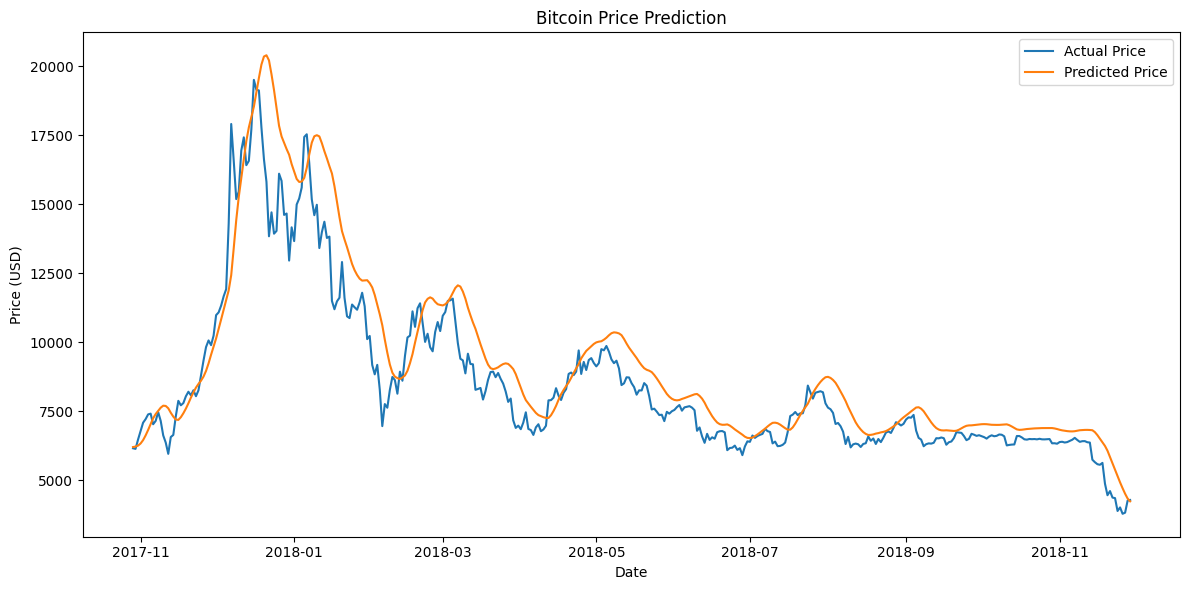

In [112]:
#Plot graph
plt.figure(figsize=(12,6))
plt.plot(dates_test, y_test_actual, label='Actual Price')
plt.plot(dates_test, predictions_actual, label='Predicted Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.show()

# Other Cryptocurrency Predictions


After verifying the model on BTC, I extended it to 5 more cryptocurrencies because of system crash with all 2005 symbols


I Selected only the first 5 to:
1. To avoid system crash
2. Model preparation for getting prediction for the symbols we write.
3. Compare RMSE and MAE for multiple symbols efficiently.


Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - loss: 0.0011
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 1.2569e-04
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 1.2529e-04
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 7.1983e-05
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 8.3808e-05
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step
BTC: RMSE = 1455.21, MAE = 1141.23


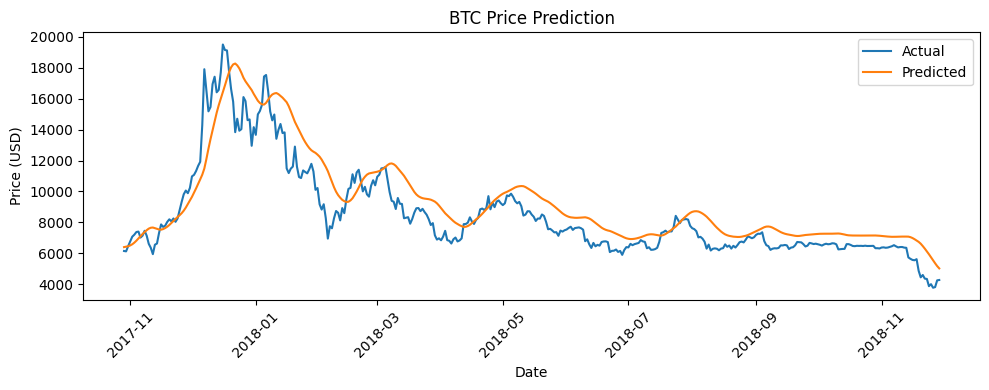

Epoch 1/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 2.2362e-04
Epoch 2/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 3.2655e-05
Epoch 3/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 6.4744e-05
Epoch 4/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 2.7659e-05
Epoch 5/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - loss: 2.6013e-05
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
XRP: RMSE = 0.23, MAE = 0.13


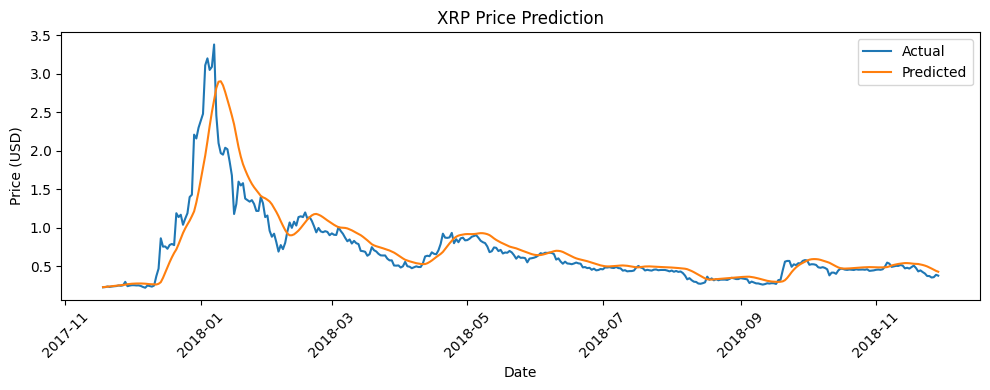

Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0141
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0025
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0018
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0019
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0015
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step
ETH: RMSE = 43.65, MAE = 34.54


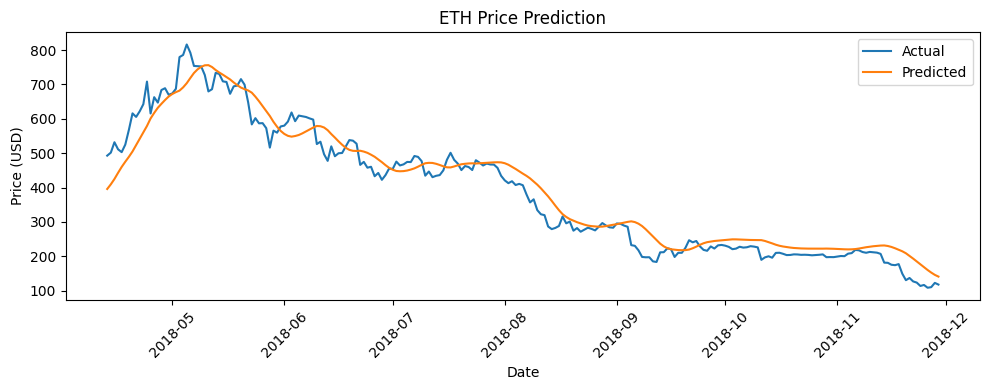

Epoch 1/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 0.0076
Epoch 2/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0011
Epoch 3/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0018
Epoch 4/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 8.5206e-04
Epoch 5/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0011
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
XLM: RMSE = 0.09, MAE = 0.08


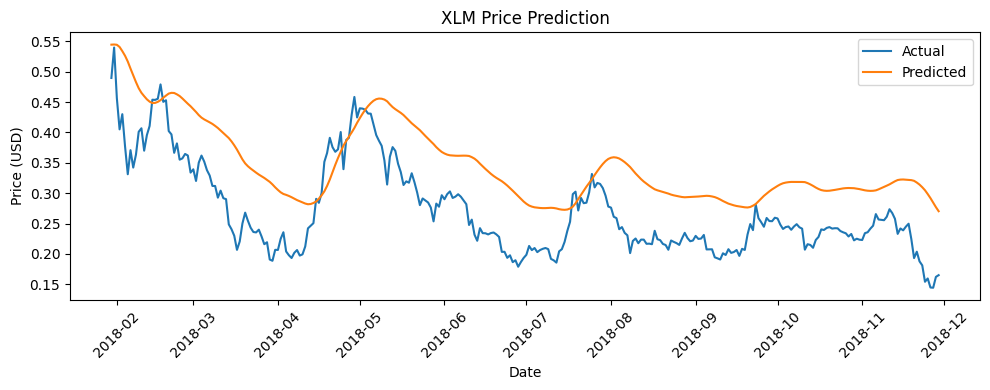

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0494
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0115
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0067
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0085
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0062
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 279ms/step
BCH: RMSE = 114.83, MAE = 93.44


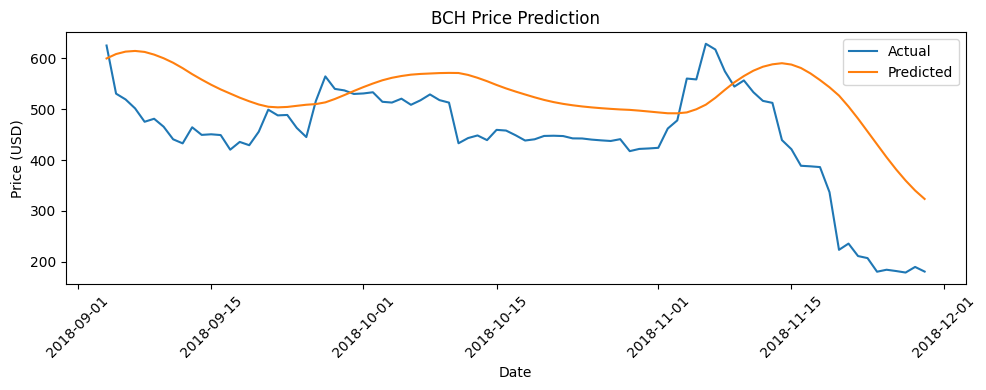

,Symbol,RMSE,MAE,Notes
0,BTC,1234.047266,899.420981,Trained successfully
1,XRP,0.211330,0.100097,Trained successfully
2,ETH,58.705141,43.632768,Trained successfully
3,XLM,0.086489,0.078481,Trained successfully
4,BCH,116.368507,95.443304,Trained successfully


In [113]:
# Function with proper date handling
def train_crypto_lstm(symbol_df, symbol_name, results, epochs=10, batch_size=32):
    # Get closing prices and reshape for scaler
    close_prices = symbol_df['close'].values.reshape(-1,1)

    # Skip if not enough data points
    if len(close_prices) < 61:
        print(f"Skipping {symbol_name}: not enough data")
        return results

    # Scale the closing prices between 0 and 1
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(close_prices)

    # Create sequences of last 60 days to predict next day
    seq_length = 60
    X, y = create_sequences(scaled_data, seq_length)

    # Store dates corresponding to y
    dates = symbol_df['date'].values[seq_length:]

    # Reshape X for LSTM input: (samples, sequence_length, features)
    X = X.reshape(X.shape[0], X.shape[1], 1)

    # Split data into training (80%) and testing (20%)
    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]
    dates_test = dates[split:]

    # Build the LSTM model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(1)
    ])

    # Hyperparameter explanation:
    # LSTM units=50 → balances capacity vs overfitting for medium time-series.
    # Dropout=0.2 → drops 20% connections for better generalization.

    # Compile and train the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)  # verbose=1 for monitoring

    # Make predictions on test data
    predictions = model.predict(X_test)

    # Convert scaled predictions and y_test back to original prices
    predictions_actual = scaler.inverse_transform(predictions)
    y_test_actual = scaler.inverse_transform(y_test)

    # Calculate RMSE and MAE
    rmse = np.sqrt(mean_squared_error(y_test_actual, predictions_actual))
    mae = mean_absolute_error(y_test_actual, predictions_actual)

    results.append({
        'Symbol': symbol_name,
        'RMSE': rmse,
        'MAE': mae,
        'Notes': 'Trained successfully'
    })

    print(f"{symbol_name}: RMSE = {rmse:.2f}, MAE = {mae:.2f}")

    # Plot with real dates on x-axis
    plt.figure(figsize=(10,4))
    plt.plot(dates_test, y_test_actual, label='Actual')
    plt.plot(dates_test, predictions_actual, label='Predicted')
    plt.title(f"{symbol_name} Price Prediction")
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.xticks(rotation=45)  # Rotate for readability
    plt.legend()
    plt.tight_layout()
    plt.show()

    return results


# Loop through first 5 cryptocurrencies
symbols = crypto['symbol'].unique()[:5]
for symbol in symbols:
    df_symbol = crypto[crypto['symbol'] == symbol][['date', 'close']].dropna().sort_values('date')
    df_symbol['date'] = pd.to_datetime(df_symbol['date'])
    df_symbol.reset_index(drop=True, inplace=True)

    # Call function and update results
    results = train_crypto_lstm(df_symbol, symbol, results)

# Save results to Google Drive (update path as needed)
results_df = pd.DataFrame(results)
results_df.to_csv('/content/crypto_lstm_results.csv', index=False)
results_df.head()

## Cryptocurrency Dataset Analysis: Conclusion

Dataset Overview:
  The dataset contains historical data for multiple cryptocurrencies from 2013 to 2018, covering fields such as:
1.  Date
2. Symbol
3. Open, High, Low, Close prices
4. Volume and Market Cap
5. Close Ratio and Spread

Overall Observation:
  Made datset as:
  - Time-series forecasting using models like LSTM.
  - Building financial dashboards showing trends, moving averages, and volatility.
  - Comparative analysis across multiple cryptocurrencies to identify market behaviour patterns.

This model can help to get any crypto currency predictive analysis.